## Principal Components Analysis
### 0. Why is it useful?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# import the PCA module from sklearn
from sklearn.decomposition import PCA

In [4]:
# read in a dataset of word vectors (this is from Unit 4 Lesson 2: NLP)
url ='https://raw.githubusercontent.com/austinlasseter/learnspacy/master/words300df.csv'
words_df=pd.read_csv(url)
words_df.shape

(10, 300)

In [5]:
# make a list of 10 words from Unit 4 Lesson 2
# these words are the index of the df
words = ['car', 'truck', 'suv', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince',  'potato']

In [6]:
# Take a look at the df
# Why 300? https://code.google.com/archive/p/word2vec/
words_df.index=words
words_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
car,0.209870,0.46481,-0.242380,-0.065751,0.60856,-0.346980,-0.25331,-0.42590,-0.222770,2.2913,...,-1.19240,-0.463950,0.669840,-0.49404,0.441540,-0.43699,0.235380,0.321350,0.266490,0.224380
truck,0.219160,0.33113,0.068603,-0.158140,0.47723,0.280000,-0.40688,-0.37803,-0.093286,1.9458,...,-0.64227,-0.906760,0.869490,-0.28303,-0.084425,-0.89242,0.129450,0.275580,0.073594,-0.029304
suv,-0.068504,0.42310,0.329890,-0.419290,0.51394,0.097215,0.11566,-0.10200,-0.194500,-0.3830,...,-0.52782,-0.576770,-0.043894,-1.07040,0.207500,-0.72830,-0.131050,0.030543,0.349170,-0.418070
elves,-0.526580,-0.63112,-0.962200,-0.232330,-0.38139,-0.024054,0.32924,0.31445,-0.587620,1.0160,...,-0.57048,0.398160,0.296440,0.44622,-0.376030,0.40369,0.048205,0.129960,0.003736,-0.199620
dragon,-0.329310,-0.51365,-0.285020,-0.194470,-0.10735,0.105630,0.14797,0.27913,0.069221,0.7256,...,-0.36388,-0.069899,-0.343330,0.18140,0.082393,0.85123,-0.086035,0.795440,0.700320,-0.161140


Why do the 2 most popular neural models — Word2Vec and GloVe - consistently use 300-D word vectors?  
* "having a lower number of parameters leads to better generalization. It is found that 300-dimensional word embeddings perform much better than, say, 3000-dimensional ones." 
* https://medium.com/explorations-in-language-and-learning/understanding-word-vectors-f5f9e9fdef98

In [7]:
# let's look at our first word and its 300D word vectors
print(words[0])
words_df.iloc[0].tail()

car


295   -0.43699
296    0.23538
297    0.32135
298    0.26649
299    0.22438
Name: car, dtype: float64

In [8]:
# intialise the pca model 
pca = PCA(n_components=2)

In [9]:
# fit the pca model to our 300-dimensional data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(words_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(words_df)
len(word_vecs_2d)

10

In [11]:
# let's take look at our first word and its new 2D word vectors
print(words[0])
word_vecs_2d[0]

car


array([4.93139721, 0.24494976])

In [12]:
# each word and vector pair are coordinates
list(zip(words, word_vecs_2d))

[('car', array([4.93139721, 0.24494976])),
 ('truck', array([4.64322388, 0.23170959])),
 ('suv', array([ 4.39673752, -0.34916718])),
 ('elves', array([-2.22978217,  3.61092297])),
 ('dragon', array([-2.15291099,  2.26930613])),
 ('sword', array([-2.65302717,  2.91170629])),
 ('king', array([-2.67514765, -3.1117719 ])),
 ('queen', array([-2.2330468 , -3.38980118])),
 ('prince', array([-2.38870115, -1.77923695])),
 ('potato', array([ 0.36125732, -0.63861753]))]

In [13]:
# Make that into a dataframe
df_2dim=pd.DataFrame(word_vecs_2d, columns=['x', 'y'])
df_2dim.index=words
df_2dim

,x,y
car,4.931397,0.244950
truck,4.643224,0.231710
suv,4.396738,-0.349167
elves,-2.229782,3.610923
dragon,-2.152911,2.269306
sword,-2.653027,2.911706
king,-2.675148,-3.111772
queen,-2.233047,-3.389801
prince,-2.388701,-1.779237
potato,0.361257,-0.638618


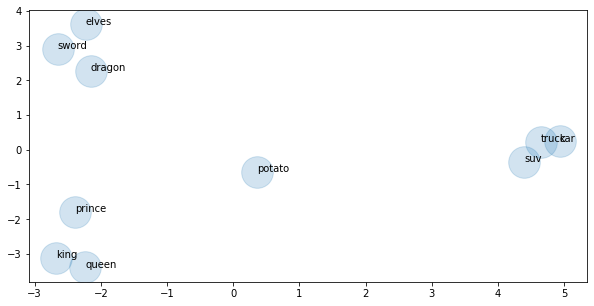

In [18]:
# create a  plot 
plt.figure(figsize=(10,5))

plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1], s=1000, alpha=.2)

for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=10)
    
plt.show()

### Plotly graph  
* Plotly website: https://plot.ly/python/
* Plotly Forum: https://community.plot.ly/
* Github repository: https://github.com/austinlasseter/plotly_dash_tutorial


In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

In [ ]:
# for colab notebooks:
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

In [ ]:
# then run in each cell that you want to use plotly:
enable_plotly_in_cell()


In [ ]:
# for each word and coordinate pair: draw the text on the plot
x_values=df_2dim['x']
y_values=df_2dim['y']

In [ ]:
# now with plotly create a dictionary of values using the 'go.Scatter' class
mydata = go.Scatter(x = x_values, y=y_values, mode='markers', hovertext=words)

In [ ]:
enable_plotly_in_cell() # don't forget to include this! It's just for colab notebooks.
# wrap that dictionary into a list and display using 'go.Figure' class
myfigure=go.Figure([mydata])
myfigure.show()

### 3 dimensions

In [ ]:
# intialise pca model for 3 dimensions
pca = PCA(n_components=3)

In [ ]:
# fit the pca model to our 300-dimensional data
pca.fit(words_df)

In [ ]:
# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_3d = pca.transform(words_df)
len(word_vecs_3d)

In [ ]:
# let's look at our first word and its new 3D word vectors
print(words[0])
word_vecs_3d[0]

In [ ]:
# each word and vector pair are coordinates
list(zip(words, word_vecs_3d))

In [ ]:
# convert to a 3D dataframe
df_3dim=pd.DataFrame(word_vecs_3d, columns=['x', 'y', 'z'])
df_3dim.index=words
df_3dim

In [ ]:
# for each word and coordinate pair: 
x_values=df_3dim['x']
y_values=df_3dim['y']
z_values=df_3dim['z']

In [ ]:
# now with plotly create a dictionary of values using the 'go.Scatter' class
mydata = go.Scatter3d(x = x_values, 
                      y = y_values, 
                      z = z_values, 
                      mode='markers', 
                      hovertext=words,
                      marker=dict(
                            size=12,
                            color=z_values,                # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )
                     )

In [ ]:
enable_plotly_in_cell() # don't forget to include this! It's just for colab notebooks.
# wrap that dictionary into a list and display using 'go.Figure' class
myfigure=go.Figure([mydata])
myfigure.show()

### 1. Vertical Line Test

Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 14})

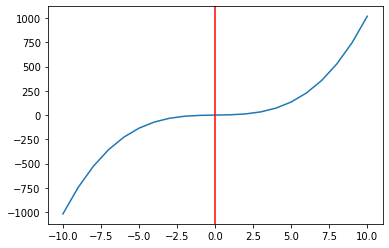

In [2]:
# plot a line that passes the vertical line test
x = np.arange(-10, 11)
y = x**3 + 2*x
plt.plot(x, y)  
plt.axvline(x=0, color='r');

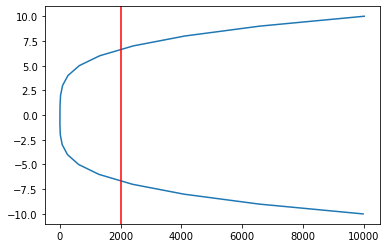

In [3]:
# plot a line that doesn't pass the vertical line test
y = np.arange(-10, 11)
x = y**4 + 2*y
plt.plot(x, y)  
plt.axvline(x=2000, color='r');

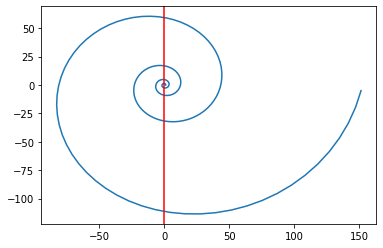

In [2]:
# plot a line that doesn't pass the vertical line test
theta = np.arange(0, 8 * np.pi, 0.1)
x = np.cos(theta) * np.exp(0.2 * theta)
y = np.sin(theta) * np.exp(0.2 * theta)
plt.plot(x, y)
plt.axvline(x=0, color='red')
plt.show()
# Shout-out to Robert Sharp for helping me refactor this code!

Why are graphs that don't pass the vertical line test not considered "functions?"

In [5]:
# A function cannot have the same input 
# (x value/domain value) mapped to multiple outputs
# (y value/co-domain value).

### 2. Functions as Relations

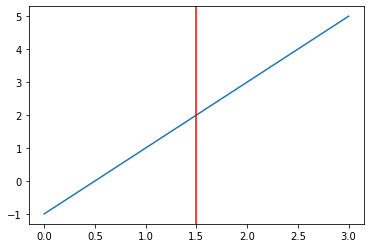

In [20]:
# plot the function f(x) = 2x + 3
x = np.arange(-2, 2)
y = 2*x + 3
plt.plot(y)
plt.axvline(x=1.5, color='red')
plt.show()

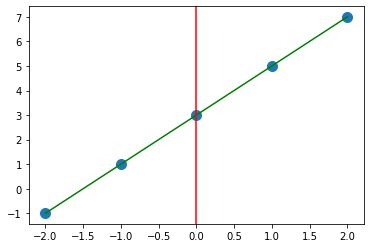

In [21]:
# Relation 0:
# (-2, -1), (-1, 1), (0, 3), (1 ,5), (2 ,7)
x = np.array([-2, -1, 0, 1, 2])
y = np.array([-1, 1, 3, 5, 7])
plt.scatter(x, y, s=100)
plt.plot(x, y, color='g')
plt.axvline(x=0, color='red');

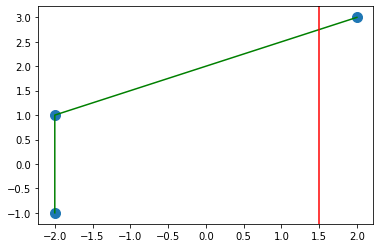

In [23]:
# Relation 1: (-2, -1), (-2, 1), (2, 3)
x = np.array([-2, -2, 2])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='g')
plt.axvline(x=1.5, color='red');

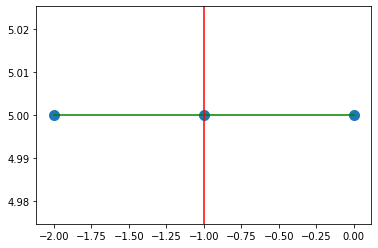

In [26]:
# Relation 2: (-2, 5), (-1, 5), (0, 5)
# no two different y values mapped to same x value!
x = np.array([-2, -1, 0])
y = np.array([5, 5, 5])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='g')
plt.axvline(x=-1, color='red');

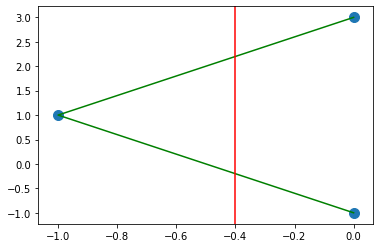

In [27]:
# Relation 3: (0, -1), (-1, 1), (0, 3)
x = np.array([0, -1, 0])
y = np.array([-1, 1, 3])
plt.scatter(x, y, s=100)
plt.plot(x,y, color='g')
plt.axvline(x=-.4, color='red');

### 3. Functions as a mapping between dimensions

input is 2 dimensions, output is 1 dimension
[6, 8, 10, 12]


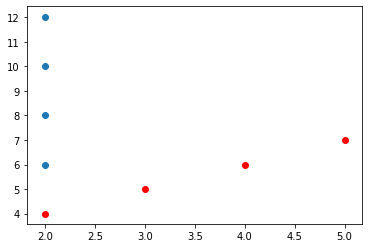

In [29]:
# plot the function g(a1, a2) = a1 + x2

def g(z):
    '''
    input is a tuple with exactly 2 elements
    output is a single integer 
    '''
    return z[0] + z[1]


In [ ]:
# what is the dimensionality of the domain (input)?
# and codomain (range/output)?
print('input is 2 dimensions, output is 1 dimension')


In [ ]:
# Plot this function with example data:
x=[2,2,2,2]
y=[]
for point in [(2,4), (3,5), (4,6), (5,7)]:
    plt.scatter(x=point[0], y=point[1], c='r');
    y.append(g(point))

print(y)
plt.scatter(x, y);

[22, 32, 42] [25, 30, 35]


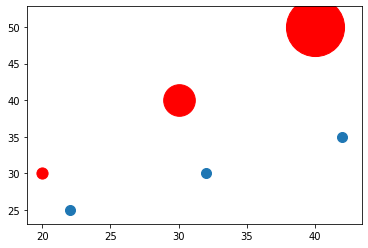

In [12]:
# plot the function h(z1, z2, z3) = (z1 + 2, z2-z3)

def h(z):
    return z[0] + 2, z[1]-z[2]
x=[]
y=[]
for point in [(20,30,5), (30,40,10), (40,50,15)]:
    plt.scatter(x=point[0], 
                y=point[1], 
                s=point[2]**3, 
                c='r');
    x.append(h(point)[0])
    y.append(h(point)[1])

print(x, y)
plt.scatter(x,y, s=100);

### 4. Vector Transformations

In [13]:
# write a function to imitate the lecture notebook:
def f(vect):
    x1=vect[0][0]
    x2=vect[1][0]
    row1 = np.array([2*x1 + x2])
    row2 = np.array([-3*x2 + x1])
    output_vector=np.array([row1, row2])
    return output_vector

In [14]:
# Apply f to x-axis unit vector 
i_hat=np.array([[1],[0]])
a=f(i_hat)
a

array([[2],
       [1]])

In [15]:
# Apply f to y-axis unit vector
j_hat=np.array([[0],[1]])
b=f(j_hat)
b

array([[ 1],
       [-3]])

In [16]:
# Turn those into a matrix 
# (notice this cool np trick for combining column vectors)
T = np.column_stack([a,b])
T

array([[ 2,  1],
       [ 1, -3]])

In [17]:
# Turn those into a dataframe, for comparison
pd.DataFrame(T)

,0,1
0,2,1
1,1,-3


In [18]:
# use the original function again
input_vector=np.array([[3],[4]])
f(input_vector)

array([[10],
       [-9]])

In [19]:
# Now lets do it via matrix multiplication (ie, by hand).
# Do we get the same answer?
output_vector=np.matmul(T, input_vector)
output_vector

array([[10],
       [-9]])

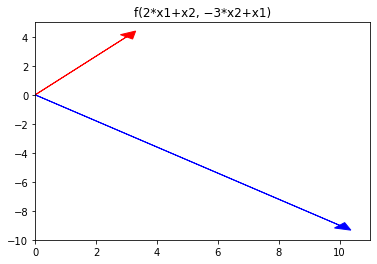

In [20]:
# Display that transformation visually.
plt.arrow(0,0, input_vector[0][0], input_vector[1][0],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, output_vector[0][0], output_vector[1][0],head_width=.5, head_length=0.5, color ='blue')
plt.xlim(0,11)          
plt.ylim(-10,5);
plt.title('f(2*x1+x2, −3*x2+x1)');

In [21]:
# What exactly is the take-away from all of this?
print('We can describe our function f as the product of any vector and T')

We can describe our function f as the product of any vector and T


In [22]:
# Wait. what?
print('We can describe any linear transformation as matrix vector multiplication.')

We can describe any linear transformation as matrix vector multiplication.


### 5. Eigenvalues and Eigenvectors

In [23]:
# Suppose we have a linear transformation (matrix T).
T = np.array([[-1, 3, -1], [-3,5,-1], [-3,3,1]])
T

array([[-1,  3, -1],
       [-3,  5, -1],
       [-3,  3,  1]])

In [24]:
# The numpy 'eig' function returns a tuple of two values.
w, v = np.linalg.eig(T)

In [25]:
# Tuple[0] contains the eigenvalues (one for each column).
print('evalues:')
w

evalues:


array([1., 2., 2.])

In [26]:
#  Tuple[1] contains the corresponding eigenvectors, as columns. 
print('eigenvectors:')
print(v)

eigenvectors:
[[-0.57735027 -0.10893917 -0.52206272]
 [-0.57735027  0.21459692 -0.68943695]
 [-0.57735027  0.97060827 -0.50212269]]


In [27]:
# To get the first eigenvector and its eigenvalue:
evector_0 = v[:,0]
evalue_0=w[0]
print(evector_0)
print(evalue_0)

[-0.57735027 -0.57735027 -0.57735027]
1.0000000000000022


In [28]:
# Dot product of matrix and first eigenvector:
np.dot(T, evector_0)

array([-0.57735027, -0.57735027, -0.57735027])

In [29]:
# Same as multiplying first eigenvalue and eigenvector:
evalue_0*evector_0

array([-0.57735027, -0.57735027, -0.57735027])

In [30]:
# Create a new matrix, with the eigenvalaues on the diagonal.
D=np.diag(w)
D

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [31]:
# Why is this important?
print('Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.')

Eigenvalues and eigenvectors can be used to decompose any square matrix by diagonalizing it.


In [32]:
# Okay, do this for any matrix.
P = np.random.randint(1,5,(3,3))
w, v = np.linalg.eig(P)
D=np.diag(w)
print(P)
print(D)

[[3 2 2]
 [3 3 1]
 [4 3 2]]
[[ 7.44465898  0.          0.        ]
 [ 0.         -0.18213967  0.        ]
 [ 0.          0.          0.73748068]]


More info [here](https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors) about how to use eigenvalues to diagonalize a matrix.

### 6. The Curse of Dimensionality

In [33]:
# What is the curse of dimensionality?
print('When your data has too many features.')

When your data has too many features.


In [34]:
# Make a dataframe of 50 points
df = pd.DataFrame({'x':np.random.randint(0, 100, 50)})

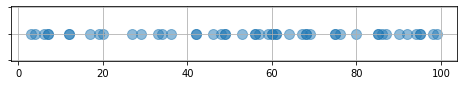

In [35]:
# Plot the floats on a one-dimensional number line
fig, ax = plt.subplots(figsize=(8,1))
ax.grid()
ax.set_yticklabels([])
plt.scatter(df['x'], np.zeros(50), s=100, alpha=0.5);

In [36]:
# Add a y column
df['y'] = pd.DataFrame({'x':np.random.randint(0, 100, 50)})
df.head()

,x,y
0,68,33
1,61,92
2,53,43
3,49,72
4,69,76


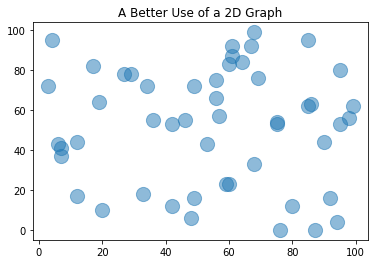

In [37]:
# Graph 2D data on a 2D plot
plt.scatter(df['x'], df['y'], alpha=0.5, s=200)
plt.title("A Better Use of a 2D Graph");

In [38]:
# Add a z column
df['z'] = pd.DataFrame({'x':np.random.randint(0, 100, 50)})
df.head()

,x,y,z
0,68,33,43
1,61,92,58
2,53,43,57
3,49,72,5
4,69,76,50


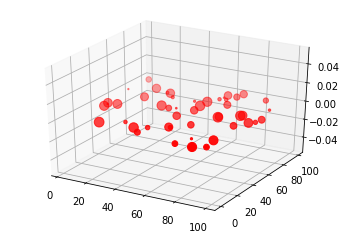

In [39]:
# Graph 3-Dimensional Data 
from mpl_toolkits.mplot3d import Axes3D
plt.figure().gca(projection='3d')
plt.scatter(df['x'], df['y'], df['z'], color='r')
plt.show()

### 7. Principal Component Analysis

In [40]:
# load the Wisconsin Breast Cancer dataset
url='https://raw.githubusercontent.com/austinlasseter/DS-Unit-1-Sprint-3-Linear-Algebra/master/module3-dimensionality-reduction/cancer.csv'
cancer=pd.read_csv(url)
cancer.sample(5)

,malignant,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
65,0,14.78,23.94,97.40,668.3,0.11720,0.14790,0.126700,0.090290,0.1953,...,17.31,33.39,114.60,925.1,0.1648,0.34160,0.30240,0.16140,0.3321,0.08911
475,1,12.83,15.73,82.89,506.9,0.09040,0.08269,0.058350,0.030780,0.1705,...,14.09,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802
43,0,13.28,20.28,87.32,545.2,0.10410,0.14360,0.098470,0.061580,0.1974,...,17.38,28.00,113.10,907.2,0.1530,0.37240,0.36640,0.14920,0.3739,0.10270
332,1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
133,1,15.71,13.93,102.00,761.7,0.09462,0.09462,0.071350,0.059330,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.19490,0.17090,0.13740,0.2723,0.07071


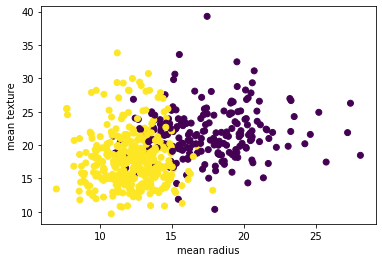

In [41]:
# Try to visualize a little bit of this dataset.
# Purple=0, Yellow=1
plt.scatter(cancer['mean radius'], cancer['mean texture'], c=cancer['malignant'])
plt.xlabel('mean radius')
plt.ylabel('mean texture');

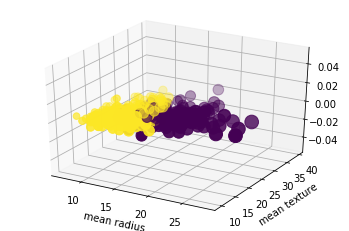

In [42]:
# Now in 3D
from mpl_toolkits.mplot3d import Axes3D
plt.figure().gca(projection='3d')
plt.scatter(cancer['mean radius'], cancer['mean texture'], cancer['mean perimeter'], c=cancer['malignant'])
plt.xlabel('mean radius')
plt.ylabel('mean texture');

In [43]:
# start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.
from sklearn.preprocessing import StandardScaler
feature_cols=cancer.columns[1:]
feature_cols[:5]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'],
      dtype='object')

In [44]:
# normalizing the features
x = cancer.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x) 

In [45]:
# Let's check whether the normalized data has a mean of zero and a standard deviation of one.
print('{:.2f}'.format(np.mean(x)))
print(np.std(x))

-0.00
1.0


In [46]:
# convert the normalized features into a dataframe
normal_cancer = pd.DataFrame(x,columns=feature_cols)
normal_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [47]:
# use the sklearn library to import the PCA module
from sklearn.decomposition import PCA

In [48]:
# instantiate the sklearn class
# pass the desired number of components 
pca_cancer = PCA(n_components=2)

In [49]:
# call fit_transform on the aggregate data
pca_data = pca_cancer.fit_transform(x)

In [50]:
# create a DataFrame that will have 
# the principal component values for all 569 samples
df_final = pd.DataFrame(data = pca_data, columns = ['comp_1', 'comp_2'])
df_final.head()

,comp_1,comp_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [51]:
#  how much variation did each principal component explain?
pca_cancer.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [52]:
# How much total variance did we explain?
sum(pca_cancer.explained_variance_ratio_)

0.632432076515594

In [53]:
# How much information did we lose?
1-sum(pca_cancer.explained_variance_ratio_)

0.36756792348440603

In [54]:
# add back in the type of tumor
df_final['malignant']=cancer['malignant']
df_final.sample(5)

,comp_1,comp_2,malignant
16,0.230055,-1.564758,0
459,-4.087077,-0.484710,1
356,0.357894,2.127839,1
358,-2.993233,1.631392,1
489,-0.741782,-2.452035,0


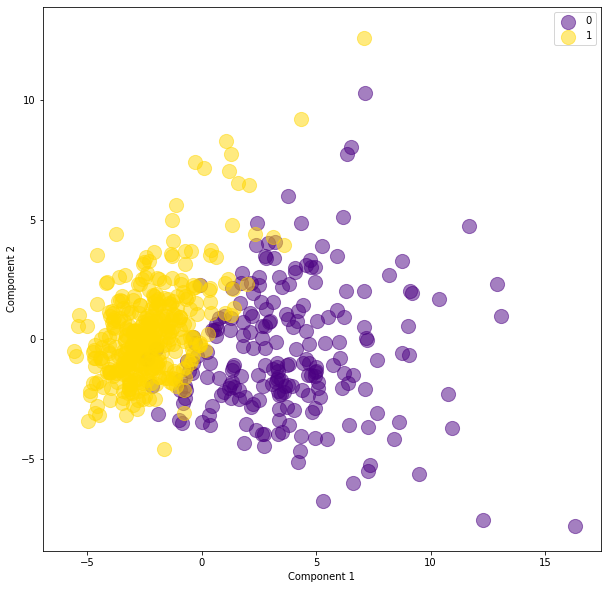

In [55]:
# plot the visualization of the data by the components
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
for k, c in [(0, 'indigo'), (1, 'gold')]:
    subset=df_final[df_final['malignant']==k]    
    plt.scatter(x=subset['comp_1'], 
                y=subset['comp_2'], 
                s=200,
                alpha=.5,
                color=c,
                label=k);
plt.legend();